# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:20:57.440267: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:21:00.196352
2025-04-14 20:21:00.196352


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:20:55"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

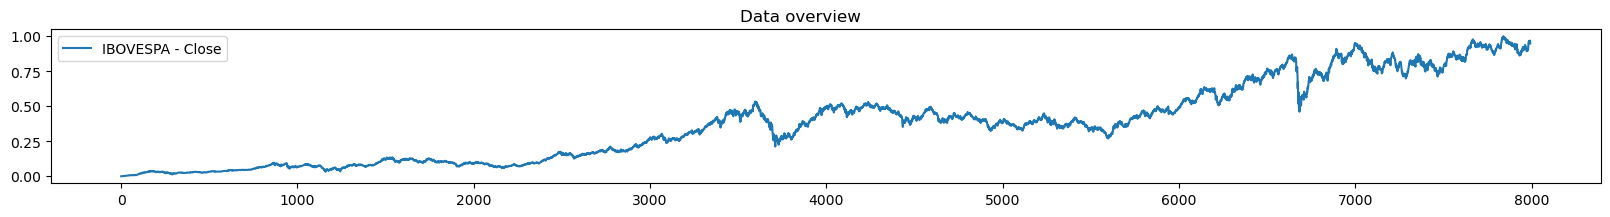

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

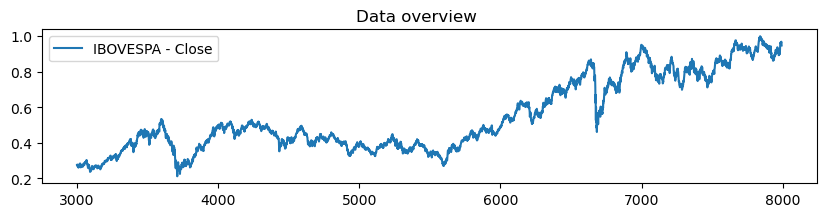

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

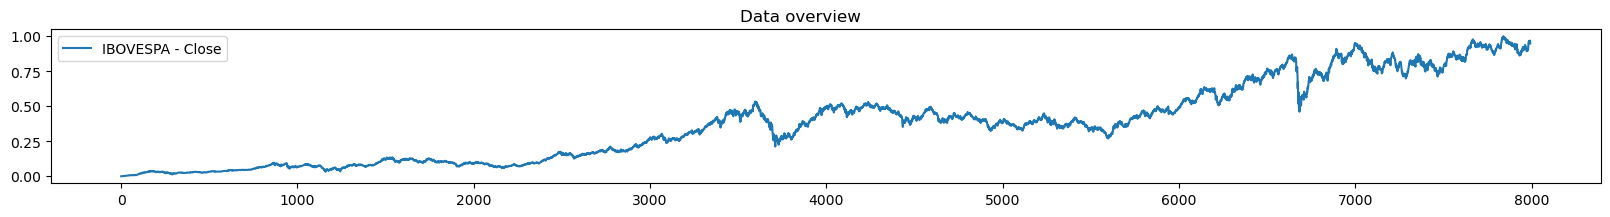

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

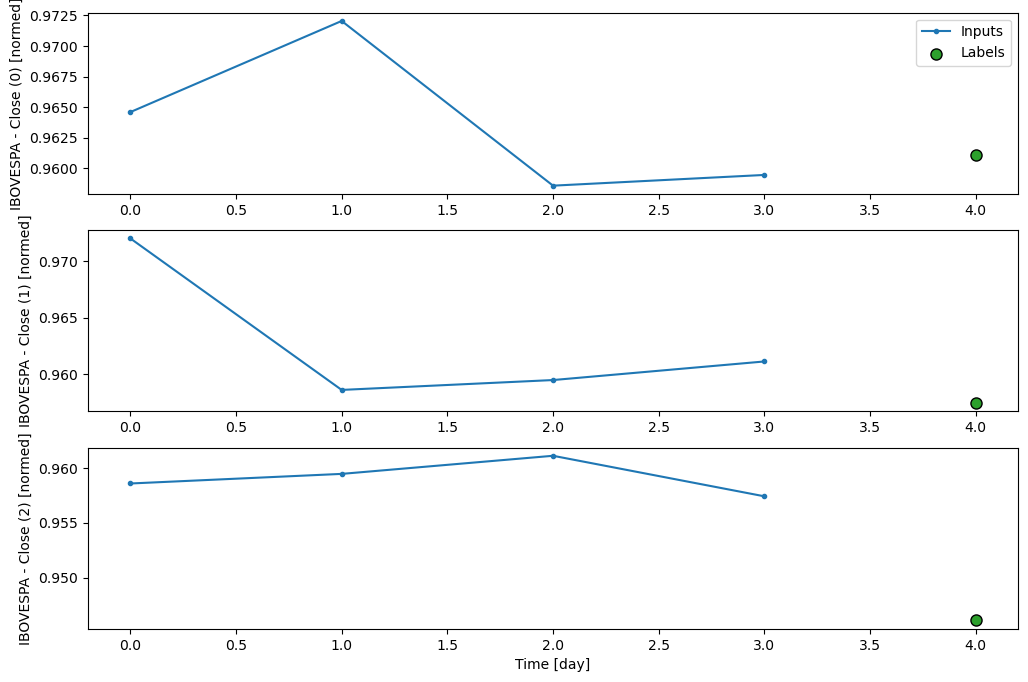

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14:59 4s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 53.2075 - mean_squared_error: 4.6824e-05 - root_mean_squared_error: 0.0064   

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 43.4304 - mean_squared_error: 5.3586e-05 - root_mean_squared_error: 0.0071

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 37.0101 - mean_squared_error: 5.2549e-05 - root_mean_squared_error: 0.0071

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 33.0549 - mean_squared_error: 6.6990e-05 - root_mean_squared_error: 0.0079

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 31.2878 - mean_squared_error: 9.4217e-05 - root_mean_squared_error: 0.0092

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.0605 - mean_squared_error: 1.3490e-04 - root_mean_squared_error: 0.0107

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 29.0964 - mean_squared_error: 1.6058e-04 - root_mean_squared_error: 0.0117

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 28.1990 - mean_squared_error: 1.8121e-04 - root_mean_squared_error: 0.0125

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 27.6480 - mean_squared_error: 2.1614e-04 - root_mean_squared_error: 0.0136

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 27.0410 - mean_squared_error: 2.5070e-04 - root_mean_squared_error: 0.0146

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 26.5271 - mean_squared_error: 2.8509e-04 - root_mean_squared_error: 0.0155

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 26.0247 - mean_squared_error: 3.2242e-04 - root_mean_squared_error: 0.0165

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 25.6097 - mean_squared_error: 3.9770e-04 - root_mean_squared_error: 0.0180

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 25.3041 - mean_squared_error: 5.4800e-04 - root_mean_squared_error: 0.0202

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 25.0921 - mean_squared_error: 6.8271e-04 - root_mean_squared_error: 0.0220

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 24.8346 - mean_squared_error: 8.1707e-04 - root_mean_squared_error: 0.0239

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 24.5310 - mean_squared_error: 9.4546e-04 - root_mean_squared_error: 0.0257

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 24.2186 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0273    

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 23.9079 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0286

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 23.6120 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 23.3132 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 23.0613 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 22.7892 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 22.5698 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 22.3383 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0365

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 22.1331 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0378 - val_loss: 0.2191 - val_mean_absolute_error: 0.2191 - val_mean_absolute_percentage_error: 23.5638 - val_mean_squared_error: 0.0495 - val_root_mean_squared_error: 0.2225 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6851 - mean_absolute_error: 0.6851 - mean_absolute_percentage_error: 32148.4102 - mean_squared_error: 0.4693 - root_mean_squared_error: 0.6851

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6486 - mean_absolute_error: 0.6486 - mean_absolute_percentage_error: 13168.3760 - mean_squared_error: 0.4227 - root_mean_squared_error: 0.6496 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5762 - mean_absolute_error: 0.5762 - mean_absolute_percentage_error: 9179.2139 - mean_squared_error: 0.3563 - root_mean_squared_error: 0.5929 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5046 - mean_absolute_error: 0.5046 - mean_absolute_percentage_error: 7205.5864 - mean_squared_error: 0.3002 - root_mean_squared_error: 0.5392

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4487 - mean_absolute_error: 0.4487 - mean_absolute_percentage_error: 5994.7788 - mean_squared_error: 0.2596 - root_mean_squared_error: 0.4967

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4042 - mean_absolute_error: 0.4042 - mean_absolute_percentage_error: 5165.3979 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4628

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3686 - mean_absolute_error: 0.3686 - mean_absolute_percentage_error: 4557.2729 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4351

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 4089.7932 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4120

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 3681.3164 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3903

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 3384.0889 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3736

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 3135.6523 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3589

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 2924.5747 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3459

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 2724.0935 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3331

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 2568.0630 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3230

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 2416.4922 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3130

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 2296.0410 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3049

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 2176.8835 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.2966

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 2080.7310 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2898

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 2002.7964 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2841

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 1939.7007 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.2794

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1849 - mean_absolute_error: 0.1849 - mean_absolute_percentage_error: 1864.7509 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2737

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 1795.9374 - mean_squared_error: 0.0888 - root_mean_squared_error: 0.2684

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 1732.5217 - mean_squared_error: 0.0859 - root_mean_squared_error: 0.2635

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 1673.8552 - mean_squared_error: 0.0833 - root_mean_squared_error: 0.2589

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 1619.4114 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2547

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 1568.7352 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2507

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 1521.4275 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2469

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 1506.3589 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2457 - val_loss: 0.1315 - val_mean_absolute_error: 0.1315 - val_mean_absolute_percentage_error: 14.0737 - val_mean_squared_error: 0.0187 - val_root_mean_squared_error: 0.1369 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6471 - mean_absolute_error: 0.6471 - mean_absolute_percentage_error: 30351.6816 - mean_squared_error: 0.4187 - root_mean_squared_error: 0.6471

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6041 - mean_absolute_error: 0.6041 - mean_absolute_percentage_error: 12404.4258 - mean_squared_error: 0.3694 - root_mean_squared_error: 0.6068 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5290 - mean_absolute_error: 0.5290 - mean_absolute_percentage_error: 8359.2236 - mean_squared_error: 0.3070 - root_mean_squared_error: 0.5503 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4821 - mean_absolute_error: 0.4821 - mean_absolute_percentage_error: 6657.8384 - mean_squared_error: 0.2676 - root_mean_squared_error: 0.5111

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4336 - mean_absolute_error: 0.4336 - mean_absolute_percentage_error: 5491.1104 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4733

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3924 - mean_absolute_error: 0.3924 - mean_absolute_percentage_error: 4704.7568 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4420

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 4183.9937 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4185

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 3777.3074 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3984

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 3450.1187 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3810

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 3180.4131 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3657

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 2953.7458 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3523

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 2760.2502 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3402

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 2592.9099 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3294

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 2446.6013 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3196

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 2317.4717 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.3106

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 2202.5684 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.3024

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 2088.8066 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2941

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 1996.9575 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2871

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 1922.4794 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.2814

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 1845.6875 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.2753

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 1775.3683 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2697

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 1703.8469 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2638

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1718 - mean_absolute_error: 0.1718 - mean_absolute_percentage_error: 1644.6930 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2588

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1671 - mean_absolute_error: 0.1671 - mean_absolute_percentage_error: 1589.8928 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2542

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 1538.9819 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2499

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1587 - mean_absolute_error: 0.1587 - mean_absolute_percentage_error: 1486.4692 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2454

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1555 - mean_absolute_error: 0.1555 - mean_absolute_percentage_error: 1447.2222 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2421 - val_loss: 0.0414 - val_mean_absolute_error: 0.0414 - val_mean_absolute_percentage_error: 4.4139 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0469 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 13590.5645 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2893

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 5452.6377 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2538  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 3843.5000 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2222

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 3037.6050 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.2004

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 2487.5864 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1823

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 2121.7681 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1684

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 1858.4884 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1574

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 1658.8451 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1483

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1486.4805 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1400

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 1362.2406 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1337

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 1248.6682 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1276

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1162.9802 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1228

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 1089.4014 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1186

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 1025.4624 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1149

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 969.3620 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1117 

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 919.7057 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1090

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 875.3897 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1066

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 835.5552 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1044

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 799.5328 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1023

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 766.7800 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1003

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 746.5401 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0991

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 736.8586 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0985

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 730.5583 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0981

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 709.4144 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0968

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 689.5763 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0956

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 670.9232 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0944

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 653.3497 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0932

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 643.7583 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0926

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 634.4747 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0921

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 621.0934 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0913

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 606.2504 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0905

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 592.1780 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0897 - val_loss: 0.0167 - val_mean_absolute_error: 0.0167 - val_mean_absolute_percentage_error: 1.8355 - val_mean_squared_error: 5.0487e-04 - val_root_mean_squared_error: 0.0225 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 14215.7402 - mean_squared_error: 0.0915 - root_mean_squared_error: 0.3025

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 7535.0693 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2907 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 4764.5435 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2603 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 3844.0183 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2404

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 3178.9666 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2223

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 2730.6106 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.2078

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1751 - mean_absolute_error: 0.1751 - mean_absolute_percentage_error: 2404.7046 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1957

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 2155.6179 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1856

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 1933.2504 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1758

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 1840.2456 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1715

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 1699.5221 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1647

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 1565.5997 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1579

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 1479.6870 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1533

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 1391.8667 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1485

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 1304.6934 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1435

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 1228.8641 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1391

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 1170.1348 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1356

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 1110.2511 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1321

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 1069.6587 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1298

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1020.4044 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1269

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 975.9329 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1243 

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 950.2556 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1227

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 916.7195 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1206

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 881.4612 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1183

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 852.9848 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1165

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 822.8359 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1145

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 798.3303 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1128

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 772.2281 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1110

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 750.8831 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1095

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 730.7982 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1081

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 711.8627 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1067

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 693.9785 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1054

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 679.4175 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1044

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 663.2565 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1031

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 647.9240 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1020 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.2567 - val_mean_squared_error: 2.0915e-04 - val_root_mean_squared_error: 0.0145 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 15617.9014 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3324

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3134 - mean_absolute_error: 0.3134 - mean_absolute_percentage_error: 7149.6187 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.3140  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 5512.9854 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2990

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 4290.9697 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2763 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 3560.1897 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2570

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 3006.9358 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2391

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 2618.6353 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2244

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 2328.9055 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2123

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 2128.5481 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.2032

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 1985.1848 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1963

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 1861.9962 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1901

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 1738.3591 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1836

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 1631.8838 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1778

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 1551.5437 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1733

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 1479.5497 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1690

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 1435.5530 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1664

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 1365.1859 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1621

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 1302.0845 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1582

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 1245.1567 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1545

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 1193.5188 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1512

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 1152.9032 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1485

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 1127.4886 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1468

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 1097.4163 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1448

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 1080.2141 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1436

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 1042.3085 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1410

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 997.6960 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1378 

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 952.8401 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1346

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 916.1271 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1319

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 878.8406 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1291

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 848.0344 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1268

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 816.4849 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1244

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 790.2267 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1223

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 765.7699 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1204

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 740.4829 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1184

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 738.0591 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1183 - val_loss: 0.0356 - val_mean_absolute_error: 0.0356 - val_mean_absolute_percentage_error: 3.7855 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0398 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 15864.9648 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3379

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 6486.0830 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.3180  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 4525.3120 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2898

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2495 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 3554.9773 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2635

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 3014.7048 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2450

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 2633.0872 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2300

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 2378.5503 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2191

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 2173.8101 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.2096

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 1983.4210 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.2003

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 1844.9996 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1931

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 1711.0431 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1858

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 1597.1573 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1793

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 1522.2252 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1748

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 1465.5105 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1714

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 1413.3077 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1682

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 1337.8602 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1634

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 1270.8394 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1590

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1218.0121 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1555

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 1183.1635 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1531

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 1144.1552 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1504

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 1107.8961 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1478

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 1068.6815 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1450

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 1032.4165 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1424

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 998.7686 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1399 

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 963.1584 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1372

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 938.2354 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1352

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 918.5278 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1337

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 899.7125 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1322

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 885.2612 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1311

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 871.3125 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1300

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 851.2744 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1283

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 826.0847 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1263

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 802.4875 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1243

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 783.0298 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1228

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 764.5864 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1213

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 751.9935 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1202 - val_loss: 0.0449 - val_mean_absolute_error: 0.0449 - val_mean_absolute_percentage_error: 4.7805 - val_mean_squared_error: 0.0024 - val_root_mean_squared_error: 0.0486 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 10932.6006 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2325

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 4429.4224 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.2115  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 3058.9211 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1880

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 2395.8972 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1703

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 1957.4652 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1557

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1693.5964 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1456

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 1499.0845 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1374

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 1348.9355 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1305

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1217.1853 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1240

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 1120.9608 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1190

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 1040.3239 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1145

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 971.6190 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1106 

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 912.2949 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1071

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 860.4894 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1039

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 814.8165 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1010

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 774.2095 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0983

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 737.8445 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0958

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 705.0665 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0936

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 675.3513 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0915

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 645.4164 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0893

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 620.8713 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0875

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 598.3010 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0858

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 581.9598 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0846

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 562.3442 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0831

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 544.1369 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0817

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 527.1863 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0804

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 511.3639 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0792

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 506.3239 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0788 - val_loss: 0.0386 - val_mean_absolute_error: 0.0386 - val_mean_absolute_percentage_error: 4.1076 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0429 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 10079.3906 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.2144

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 4085.1917 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1952  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 2819.6729 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1733

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 2207.6511 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1568

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 1803.2806 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1434

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 1560.0524 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1341

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 1363.5771 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1257

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 1228.7434 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1194

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 1120.7855 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1141

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 1032.1434 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1094

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 957.8640 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1054 

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 894.5757 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1017

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 839.9326 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0985

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 792.2284 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0955

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 750.1932 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0929

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 712.8399 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0906

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 679.3900 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0884

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 649.2368 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0864

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 621.8990 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0845

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 596.9890 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0828

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 574.1875 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0812

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 553.2289 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0796

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 533.8901 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0782

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 515.9854 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0768

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 499.3626 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0756

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 483.8879 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0745

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 469.4407 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0735

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 466.3620 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0733 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318 - val_mean_absolute_percentage_error: 3.3793 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0352 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 10359.2129 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2203

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 4198.8198 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.2008  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1721 - mean_absolute_error: 0.1721 - mean_absolute_percentage_error: 2818.7151 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1777

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 2227.9116 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1614

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 1862.0046 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1490

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 1610.2986 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1391

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 1461.7935 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1328

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 1310.8558 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1259

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1191.1854 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1201

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 1093.5969 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1150

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 1004.1436 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1101

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 936.4855 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1062 

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 872.2761 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1024

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 822.3107 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0993

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 778.3420 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0966

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 739.2936 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0941

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 704.3476 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0918

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 672.8693 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0897

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 644.3497 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0878

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 615.6354 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0857

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 592.1032 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0840

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 570.4744 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0824

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 550.5218 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0809

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 530.0844 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0794

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 513.0766 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0781

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 498.9448 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0771

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 484.0439 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0761

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 480.8689 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0759 - val_loss: 0.0251 - val_mean_absolute_error: 0.0251 - val_mean_absolute_percentage_error: 2.7956 - val_mean_squared_error: 8.9914e-04 - val_root_mean_squared_error: 0.0300 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 9721.8281 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.2067

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 3947.7505 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1895 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1620 - mean_absolute_error: 0.1620 - mean_absolute_percentage_error: 2649.6125 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1676

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 2094.5610 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1523

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 1750.8892 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1406

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 1514.5955 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1314

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 1340.4480 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1240

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1206.0312 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1177

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1088.1260 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1118

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 1002.0491 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1072

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 929.9263 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1032 

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 868.4780 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0996

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 815.4248 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0964

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 764.3350 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0933

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 724.1049 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0909

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 688.3381 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0887

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 656.2935 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0868

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 627.3921 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0850

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 603.9679 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0835

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 582.4014 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0821

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 560.0870 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0805

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 539.5847 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0791

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 520.6738 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0778

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 503.1693 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0765

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 486.9200 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0753

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 471.7910 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0742

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 457.6645 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0732

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 453.1644 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0729 - val_loss: 0.0136 - val_mean_absolute_error: 0.0136 - val_mean_absolute_percentage_error: 1.4421 - val_mean_squared_error: 2.6160e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 10445.9570 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2221

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 4246.4668 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.2047  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 2863.0229 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1831

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1580 - mean_absolute_error: 0.1580 - mean_absolute_percentage_error: 2267.6384 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1669

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 1897.7874 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1545

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 1642.7198 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1445

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 1454.2356 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1364

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 1308.6133 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1295

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 1180.8123 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1230

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 1087.4824 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1179

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 1009.2576 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1135

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 942.6091 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1096 

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 879.1403 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1057

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 829.6135 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1025

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 785.9205 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0997

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 747.0516 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0972

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 712.2128 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0948

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 677.4813 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0924

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 649.2697 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0904

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 620.8146 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0883

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 597.4594 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0865

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 575.9636 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0849

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 556.1072 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0833

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 537.7031 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0819

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 520.5923 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0805

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 504.6392 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0792

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 491.3386 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0781 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1504 - val_mean_squared_error: 1.7845e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 10159.4375 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2161

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 4126.1387 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1985  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 2869.0405 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1795

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 2360.1086 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1661

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 1943.9573 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1528

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 1666.0708 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1424

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 1465.2423 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1340

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 1312.3462 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1272

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1191.6798 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1213

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 1093.8256 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1164

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 1004.3585 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1117

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 936.7271 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1080 

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 878.5077 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1046

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 827.7975 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1016

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 783.2081 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0988

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 743.6606 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0963

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 704.6030 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0938

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 673.1392 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0916

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 644.6356 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0897

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 621.4509 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0880

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 597.4778 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0863

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 575.4684 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0847

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 555.1794 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0831

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 536.4097 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0817

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 520.8639 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0805

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 504.5235 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0792

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 489.2765 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0780

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 479.6674 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0772 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1996 - val_mean_squared_error: 1.8636e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 9333.4648 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1985

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1815 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 3790.2734 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1822 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1578 - mean_absolute_error: 0.1578 - mean_absolute_percentage_error: 2551.5266 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1623

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 2018.8251 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1477

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 1689.1127 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1367

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 1462.4911 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1281

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 1295.2925 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1210

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 1166.2391 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1152

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 1053.1050 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1096

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 962.4643 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1051 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 894.6263 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1015

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 830.7349 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0979

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 781.3137 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0950

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 738.0219 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0924

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 699.7567 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0900

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 672.9100 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0882

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 644.8956 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0864

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 613.3098 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0843

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 587.6697 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0825

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 561.8229 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0806

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 540.6188 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0790

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 521.1119 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0776

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 503.0987 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0762

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 484.6297 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0748

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 469.2430 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0735

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 454.8979 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0724

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 441.4915 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0713 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1848 - val_mean_squared_error: 1.9902e-04 - val_root_mean_squared_error: 0.0141 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1789 - mean_absolute_error: 0.1789 - mean_absolute_percentage_error: 8417.1016 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1789

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1624 - mean_absolute_error: 0.1624 - mean_absolute_percentage_error: 3412.2310 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1631 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 2290.5120 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1443

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 1809.9583 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1310

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 1512.7301 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1210

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 1308.3922 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1131

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 1143.2926 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1060

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 1030.0496 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1007

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 930.4001 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0957 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 857.4901 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0918

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 796.2894 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0884

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 744.0729 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0853

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 698.9351 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0826

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 659.4957 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0802

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 624.7233 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0780

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 593.8113 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0761

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 566.1226 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0744

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 541.1550 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0728

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 516.1208 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0712

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 495.6795 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0698

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 478.9531 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0687

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 461.5639 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0675

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 445.5125 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 429.0608 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0651

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 415.3574 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0641

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 402.5850 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0631

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 390.6514 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0622 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 1.4545 - val_mean_squared_error: 2.6649e-04 - val_root_mean_squared_error: 0.0163 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 8721.4756 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1854

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 3532.0059 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1686 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 2450.8411 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1516

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 1966.7065 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1388

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 1628.6028 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1280

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 1400.6444 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1195

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1218.9852 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1120

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 1095.5309 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1065

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 987.7414 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1013 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 909.4971 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0974

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 844.0323 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0940

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 788.2988 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0910

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 735.2346 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0880

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 693.8319 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0855

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 653.5306 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0831

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 621.4611 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0811

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 592.6978 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0792

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 566.7382 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0775

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 543.1771 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0759

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 521.6882 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0744

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 502.0023 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0730

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 483.8938 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0717

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 467.1737 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0704

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 451.6826 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0693

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 437.2866 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0682

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 423.8686 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0671

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 409.9892 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0660 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0854 - val_mean_squared_error: 1.6549e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 8512.7080 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1810

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 3652.8743 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1674 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1503 - mean_absolute_error: 0.1503 - mean_absolute_percentage_error: 2563.4978 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1528

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 2021.5057 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1393

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 1689.0381 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1292

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 1537.4336 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1240

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 1414.3182 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1194

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 1311.6108 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1153

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 1193.3005 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1103

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 1072.4143 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1048

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 985.9298 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1006 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 930.7965 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0978

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 874.6610 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0949

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 812.6894 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0915

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 759.7657 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0884

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 709.2653 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0854

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 669.7842 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0830

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 634.8914 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0807

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 603.8033 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0787

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 575.9099 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0768

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 550.7272 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0750

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 527.8647 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0734

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 507.0057 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0719

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 485.8664 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0703

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 468.4379 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0689

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 450.6211 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0676

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 435.8178 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0664

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 422.0537 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0653

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 407.8479 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0643

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 399.8236 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0637 - val_loss: 0.0418 - val_mean_absolute_error: 0.0418 - val_mean_absolute_percentage_error: 4.4716 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0437 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 7454.8467 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1584

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 3013.2454 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1429 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 2083.6462 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1274

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1631.0404 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1152

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 1381.7365 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1073

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 1188.2255 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1003

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 1047.5001 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0947

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 939.8801 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0900 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 854.6431 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0860

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 792.4833 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0831

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 739.8012 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0805

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 689.1810 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0779

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 645.7245 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0756

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 607.9530 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0734

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 574.7940 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0715

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 545.4268 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0697

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 521.9827 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0682

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 498.1412 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0667

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 474.3251 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0651

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 454.9448 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0638

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 437.2395 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 422.7336 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0615

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 409.2535 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0605

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 395.1792 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0595

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 382.1341 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 370.0085 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 358.7066 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 352.7521 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0563

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 348.1466 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559 - val_loss: 0.0417 - val_mean_absolute_error: 0.0417 - val_mean_absolute_percentage_error: 4.4469 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0443 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 7123.7910 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1514

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - mean_absolute_percentage_error: 2881.4851 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1369 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 1991.9640 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1219

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1559.8119 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1104

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 1297.9635 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1022

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 1120.2279 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0957

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 990.0118 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0905 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 880.1896 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0857

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 802.3815 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0820

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 738.7233 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0788

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 685.4465 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0760

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 640.0997 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0735

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 617.6798 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0723

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 605.0486 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0715

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 596.9434 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0710

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 581.4384 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0701

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 566.8096 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0692

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 546.3450 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0680

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 527.4640 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 501.7136 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0652

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 478.6054 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0637

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 457.7370 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0623

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 438.7874 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0610

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 421.4958 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 405.6478 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0586

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 391.0633 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 377.5912 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0565

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 365.1054 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 353.4993 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 342.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 332.5690 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1708 - val_mean_squared_error: 1.8917e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 7047.5176 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1497

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 2704.0544 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1334 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 1907.0734 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1187

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 1473.2816 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1068

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 1237.3717 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0990

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 1074.2303 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0930

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 953.2457 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0880 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 859.5203 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0839

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 784.5052 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0803

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 723.0592 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0773

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 671.5157 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0746

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 627.5624 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0723

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 589.5681 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0701

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 556.3620 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0681

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 527.0693 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0664

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 501.0127 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0647

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 477.6622 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0632

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 456.6019 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 437.4993 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0605

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 420.0851 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 404.1390 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0582

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 389.4767 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 375.9430 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0561

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 363.4085 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 351.7658 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 340.9205 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0534

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 329.7072 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 328.6324 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0525 - val_loss: 0.0491 - val_mean_absolute_error: 0.0491 - val_mean_absolute_percentage_error: 5.2495 - val_mean_squared_error: 0.0026 - val_root_mean_squared_error: 0.0515 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - mean_absolute_percentage_error: 6776.7959 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1440

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 2740.0842 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1300 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 1894.1743 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1158

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 1482.9803 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1048

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 1233.8525 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0970

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 1064.7540 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0908

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 940.8879 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0859 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 845.6957 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0817

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 769.9427 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0781

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 701.9521 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0747

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 651.3094 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0721

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 608.2064 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0697

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 574.8903 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0678

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 545.3970 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0660

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 516.0004 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0642

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 489.9246 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 466.6143 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0611

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 445.6361 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 426.6447 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 407.5362 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 391.8866 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0560

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 377.5111 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0549

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 364.2541 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0539

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 351.9858 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 340.6002 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0521

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 330.0044 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 320.1150 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 315.9294 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504 - val_loss: 0.0379 - val_mean_absolute_error: 0.0379 - val_mean_absolute_percentage_error: 4.0576 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0400 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 6534.3750 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1388

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 2636.0142 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1244 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 1819.2606 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1104

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 1423.4528 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0998

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 1184.1940 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0924

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 1006.7343 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0860

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 891.4199 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0814 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 793.8138 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0771

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 717.6864 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0736

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 662.1500 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0709

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 615.4711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0686

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 575.5963 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0664

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 541.0728 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0645

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 510.8628 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0628

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 484.1868 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0612

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 460.4319 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0597

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 439.1263 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 417.8738 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 400.6011 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 384.8381 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 368.8578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 355.6788 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 343.4997 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 332.2080 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 321.7106 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 314.0430 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 305.7610 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 303.7677 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214 - val_mean_absolute_percentage_error: 2.2773 - val_mean_squared_error: 5.8435e-04 - val_root_mean_squared_error: 0.0242 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 6077.4551 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1291

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 2451.0085 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1155 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 1689.0387 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1021

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 1290.5819 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0912

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 1077.7177 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0842

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 931.7094 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0787 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 824.1104 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0743

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 775.5580 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0721

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 741.1360 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0705

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 688.5067 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0680

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 643.6332 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0657

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 594.7367 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0631

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 553.4592 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 518.0848 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 490.5994 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0572

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 466.1700 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0557

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 444.2957 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 422.2534 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 402.5053 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 384.6996 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0505

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 368.5514 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 353.8329 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 338.9293 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 326.6516 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 314.1096 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 303.6954 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 294.0161 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 285.9658 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 278.3873 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 277.4725 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1303 - val_mean_squared_error: 1.7481e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 6010.2939 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1276

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 2420.6301 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1137 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 1667.2759 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1004

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 1302.8651 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0905

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 1082.3882 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0834

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 932.7449 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0779 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 833.9659 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0738

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 756.2203 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0704

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 686.1406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0672

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 629.2396 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0643

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 581.9998 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0619

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 542.0444 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0597

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 504.2411 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0575

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 474.8894 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 446.4217 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 423.8488 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 401.5573 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 383.6005 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 367.3332 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 352.5216 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 337.5380 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 325.2067 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 312.6215 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 302.1794 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 291.4465 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 282.4853 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 274.1150 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423 - val_loss: 0.0195 - val_mean_absolute_error: 0.0195 - val_mean_absolute_percentage_error: 2.0724 - val_mean_squared_error: 4.7515e-04 - val_root_mean_squared_error: 0.0218 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 6323.0986 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1343

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 2555.7839 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1212 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 1767.5499 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1081

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 1352.2501 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0968

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 1130.1166 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0895

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 963.9484 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0833 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 855.2537 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0788

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 771.0664 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0751

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 703.7013 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0718

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 648.5239 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0691

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 602.2429 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0667

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 562.7833 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0646

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 528.6785 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0626

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 498.8746 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 472.5832 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0593

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 449.1984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 428.2450 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 409.3482 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 392.2091 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0540

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 379.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0532

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 365.3546 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 351.9591 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 339.6055 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 328.1727 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 317.5592 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 307.6766 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 298.4500 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 294.5444 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3334 - val_mean_squared_error: 2.3306e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 5877.4111 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1248

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 2368.5674 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1114 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 1580.4132 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0972

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 1246.1328 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0879

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 1022.1037 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0804

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 886.0323 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0752 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 785.1989 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0710

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 707.1565 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0674

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 644.7274 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0643

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 588.3723 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0614

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 542.0074 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 506.7086 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 473.0230 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 446.6870 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 423.4162 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 402.6820 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 384.0775 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 367.2784 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 352.0263 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 336.6394 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 324.0085 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 312.3816 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 301.6396 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 291.6832 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 282.4290 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 272.8800 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0415

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 267.4872 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 1.4250 - val_mean_squared_error: 2.5315e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0052


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:45s:715ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 20:21:49.383267: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:20:55',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:45s:715ms',
 'TRAINING_EPOCHS': 26,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 20:21:49.579107: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 5777.8828 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1227

 16/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 1840.5958 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1131 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1298.4553 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1092

 45/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 1020.5724 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1051

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 923.3406 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1031 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 837.1818 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1010

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 761.9358 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0989

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 707.0984 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0973

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 670.4117 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 624.9781 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0942

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 586.0032 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0924

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 552.1311 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0907

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 519.6226 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0888

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 493.5836 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0871

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 472.5322 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0857

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 449.3888 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0841

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 430.4527 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0826

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 411.5912 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0811

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 397.4848 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0799

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 384.4215 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0788

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 364.6608 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0771

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 351.5529 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0758

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 340.5172 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0748

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 335.2878 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0743


Loss: 0.03646865487098694 - MAE: 0.03646865487098694 - MSE: 0.0025372165255248547 - MAPE: 90.21562957763672 - RMSE: 0.05037079006433487


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 0.9060 - mean_squared_error: 1.0060e-04 - root_mean_squared_error: 0.0100

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3093 - mean_squared_error: 2.1217e-04 - root_mean_squared_error: 0.0145 


Loss: 0.013394776731729507 - MAE: 0.013394776731729507 - MSE: 0.0002531525387894362 - MAPE: 1.4249842166900635 - RMSE: 0.015910768881440163


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 1.6111 - mean_squared_error: 2.6541e-04 - root_mean_squared_error: 0.0163

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 1.3610 - mean_squared_error: 2.1907e-04 - root_mean_squared_error: 0.0148


Loss: 0.012058121152222157 - MAE: 0.012058121152222157 - MSE: 0.0002104619052261114 - MAPE: 1.2956265211105347 - RMSE: 0.01450730487704277


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

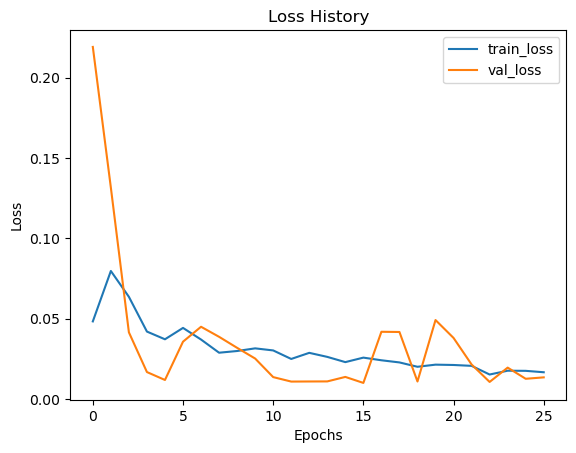

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

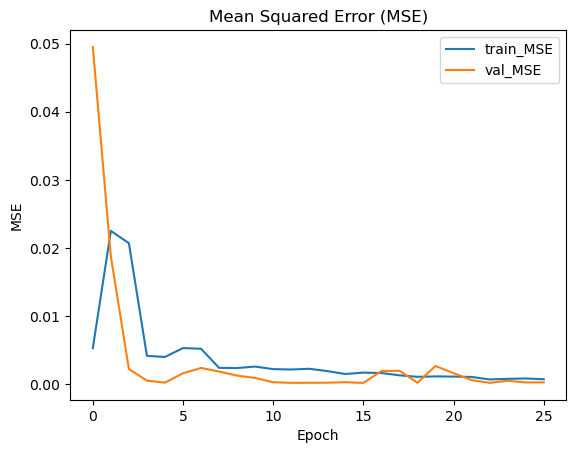

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

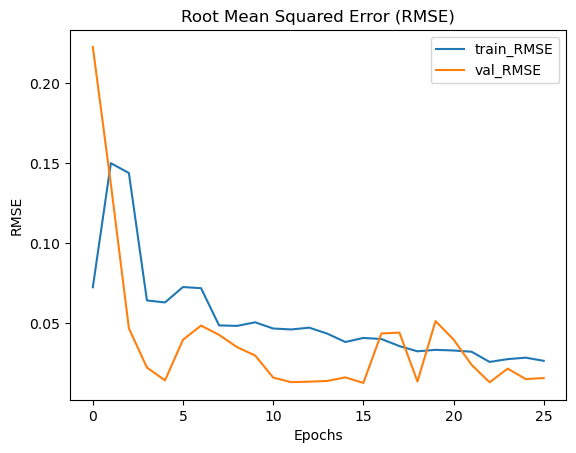

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

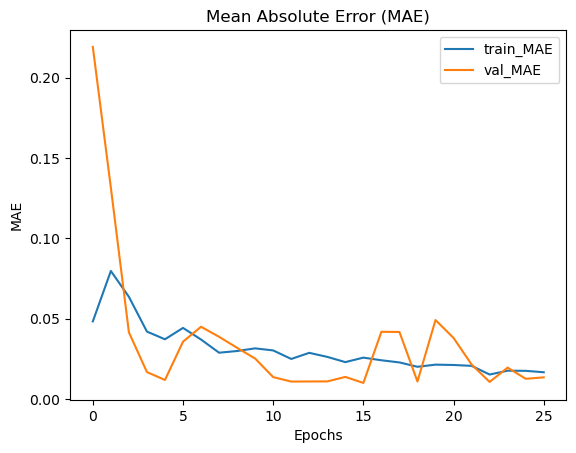

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

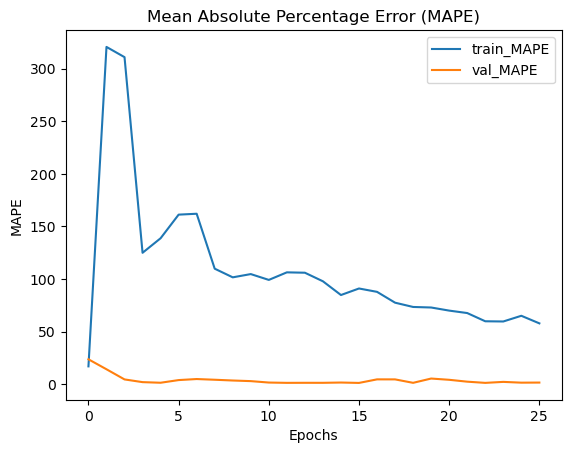

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:21:53.508677: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 1)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


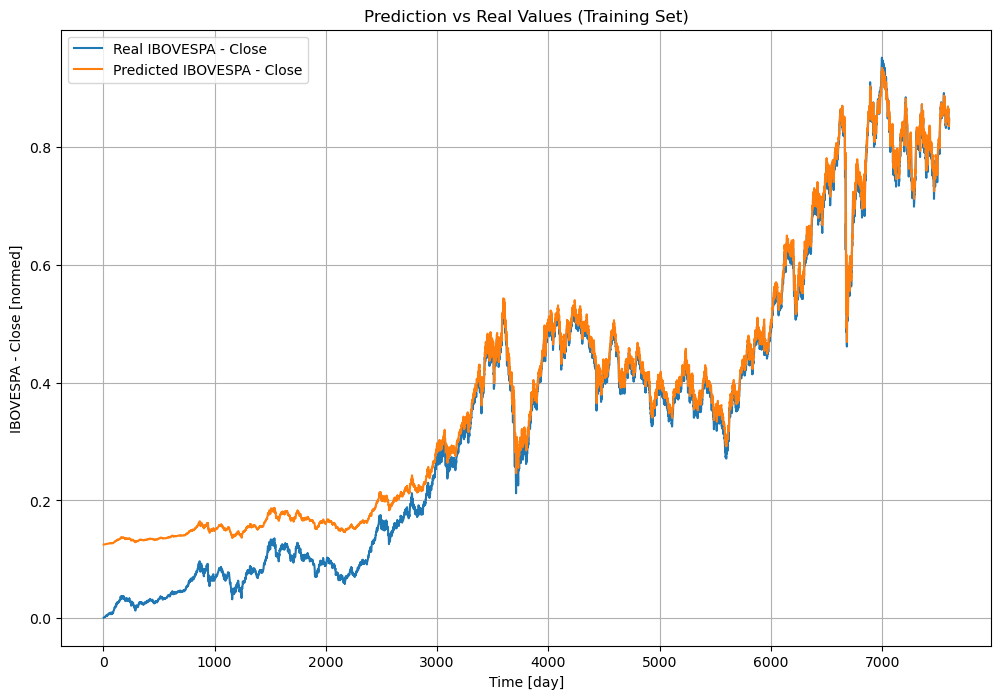

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 1)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


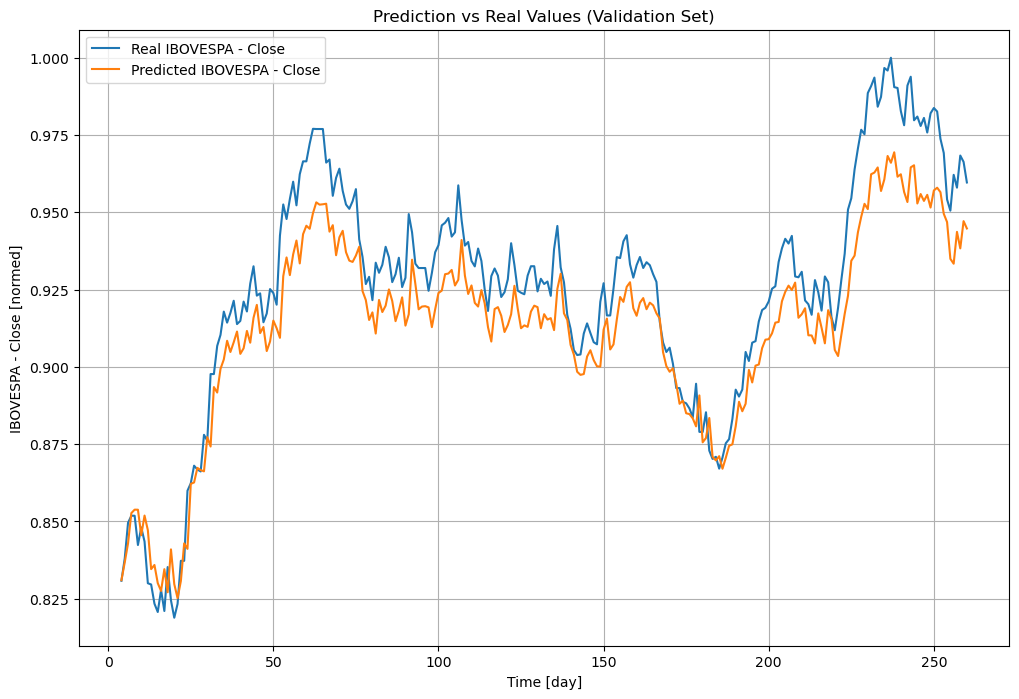

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 1)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


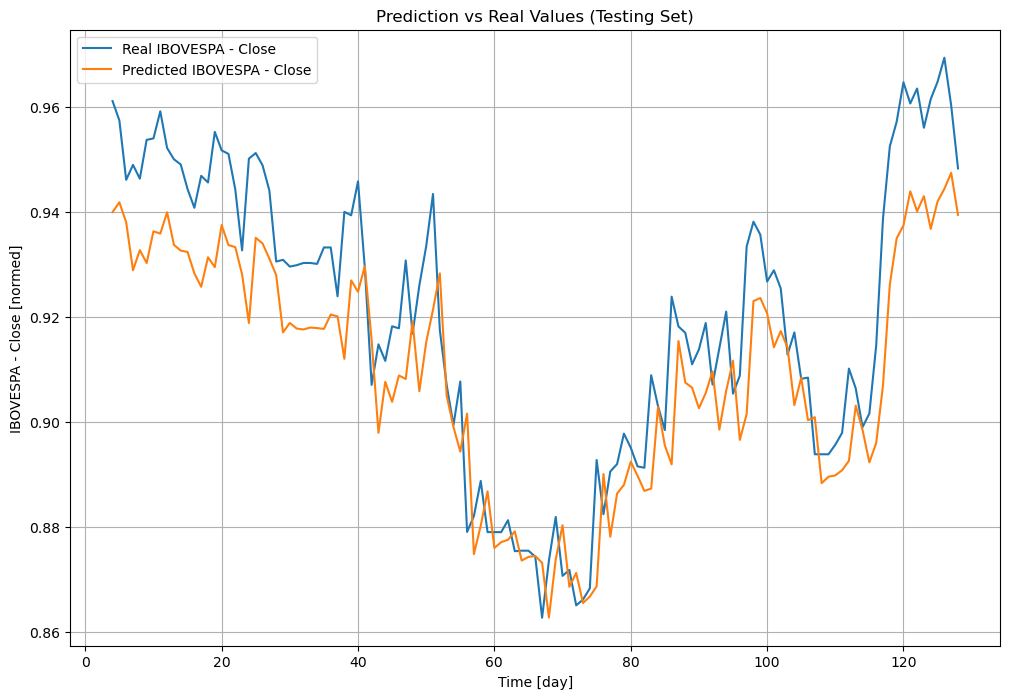

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

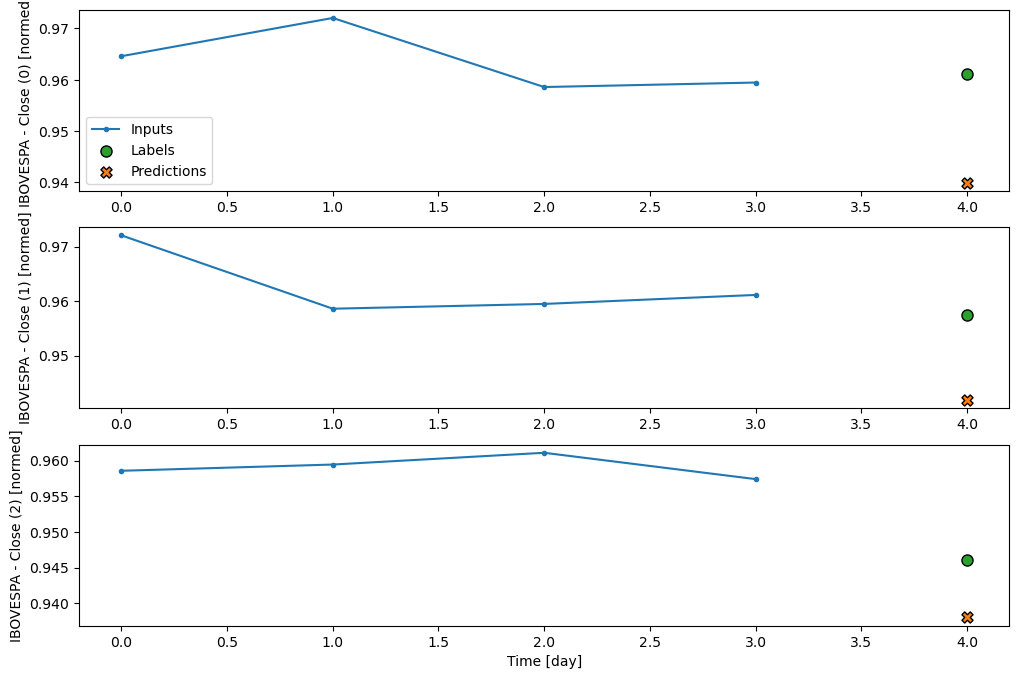

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:55s:699ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


array([[[0.9399611 , 0.9399611 , 0.9399611 , ..., 0.9399611 ,
         0.9399611 , 0.9399611 ]],

       [[0.94182616, 0.94182616, 0.94182616, ..., 0.94182616,
         0.94182616, 0.94182616]],

       [[0.93799794, 0.93799794, 0.93799794, ..., 0.93799794,
         0.93799794, 0.93799794]],

       ...,

       [[0.9443869 , 0.9443869 , 0.9443869 , ..., 0.9443869 ,
         0.9443869 , 0.9443869 ]],

       [[0.9474348 , 0.9474348 , 0.9474348 , ..., 0.9474348 ,
         0.9474348 , 0.9474348 ]],

       [[0.9394251 , 0.9394251 , 0.9394251 , ..., 0.9394251 ,
         0.9394251 , 0.9394251 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')